# Autoencoders

When training CNNs, one of the problems is that we need a lot of labeled data. In the case of image classification, we need to separate images into different classes, which is a manual effort.

However, we might want to use raw (unlabeled) data for training CNN feature extractors, which is called **self-supervised learning**. Instead of labels, we will use training images as both network input and output. The main idea of **autoencoder** is that we will have an **encoder network** that converts input image into some **latent space** (normally it is just a vector of some smaller size), then the **decoder network**, whose goal would be to reconstruct the original image.

Since we are training autoencoder to capture as much of the information from the original image as possible for accurate reconstruction, the network tries to find the best **embedding** of input images to capture the meaning.

![AutoEncoder Diagram](images/autoencoder_schema.jpg)

*Image from [Keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)*

Most of the examples below are inspired by [this article](https://blog.keras.io/building-autoencoders-in-keras.html).

Let's create simplest autoencoder for MNIST:

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_trainclass), (x_test, y_testclass) = mnist.load_data()

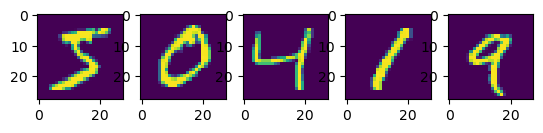

In [2]:
def plotn(n,x):
  fig,ax = plt.subplots(1,n)
  for i,z in enumerate(x[0:n]):
    ax[i].imshow(z.reshape(28,28) if z.size==28*28 else z.reshape(14,14) if z.size==14*14 else z)
  plt.show()
  
plotn(5,x_train)

In [5]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy,mse

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

encoder = Model(input_img,encoded)

input_rep = Input(shape=(4,4,8))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_rep)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(input_rep,decoded)

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1385 - val_loss: 0.0041
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


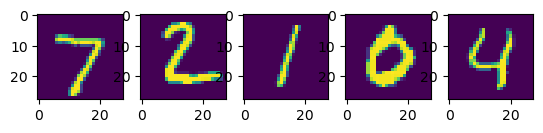

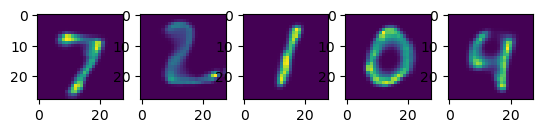

In [8]:
y_test = autoencoder.predict(x_test[0:5])
plotn(5,x_test)
plotn(5,y_test)

In [9]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test[0:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


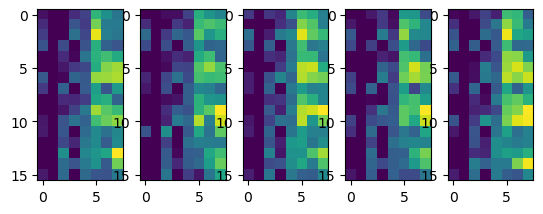

In [10]:
plotn(5,encoded_imgs.reshape(5,-1,8))

0.48413414 0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


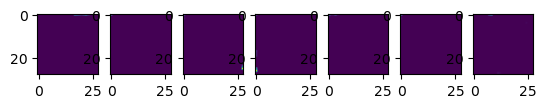

In [11]:
print(encoded_imgs.max(),encoded_imgs.min())
res = decoder.predict(7*np.random.rand(7,4,4,8))
plotn(7,res)

> **Task 1**: Try to train autoencoder with very small latent vector size, eg. 2, and plot the dots corresponding to different digits. *Hint: Use fully-connected dense layer after the convoluitonal part to reduce the vector size to the required value.*

> **Task 2**: Starting from different digits, obtain their latent space representations, and see what effect adding some noise to the latent space has on the resulting digits.

## Denoising

Autoencoders can be effectively used to remove noise from images. In order to train denoiser, we will start with noise-free images, and add artificial noise to them. Then, we will feed autoencoder with noisy images as input, and noise-free images as output.

Let's see how this works for MNIST:

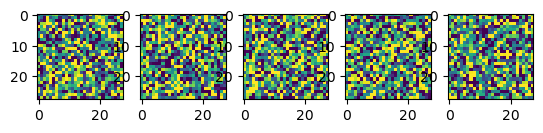

In [12]:
def noisify(data):
  return np.clip(data+np.random.normal(loc=0.5,scale=0.5,size=data.shape),0.,1.)

x_train_noise = noisify(x_train)
x_test_noise = noisify(x_test)

plotn(5,x_train_noise)

In [13]:
autoencoder.fit(x_train_noise, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 9/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 10/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 11/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 12/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms

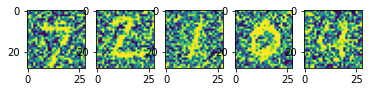

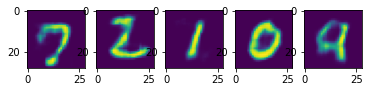

In [144]:
y_test = autoencoder.predict(x_test_noise[0:5])
plotn(5,x_test_noise)
plotn(5,y_test)

> **Exercise:** See how denoiser trained on MNIST digits works for different images. As an example, you can take [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) dataset, which has the same image size. Note that denoiser works well only on the same image type that it was trained on (i.e. for the same probability distribution of input data).

## Super-resolution

Similarly to denoiser, we can train autoencoders to increase the resolution of the image. To train super-resolution network, we will start with high-resolution images, and automatically downscale them to produce network inputs. We will then feed autoencoder with small images as inputs and high-res images as outputs.

Let's downscale MNIST to 14x14:

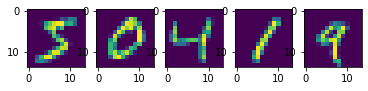

In [6]:
x_train_lr = tf.keras.layers.AveragePooling2D()(x_train).numpy()
x_test_lr = tf.keras.layers.AveragePooling2D()(x_test).numpy()
plotn(5,x_train_lr)

In [7]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy,mse

input_img = Input(shape=(14, 14, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

encoder = Model(input_img,encoded)

input_rep = Input(shape=(4,4,8))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_rep)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(input_rep,decoded)

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
autoencoder.fit(x_train_lr, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_lr, x_test))

Epoch 1/25
469/469 [==============================] - 6s 10ms/step - loss: 0.3413 - val_loss: 0.1519
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1457 - val_loss: 0.1292
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1273 - val_loss: 0.1202
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1189 - val_loss: 0.1142
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1148 - val_loss: 0.1107
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1115 - val_loss: 0.1083
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1093 - val_loss: 0.1063
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1071 - val_loss: 0.1046
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1060 - val_loss: 0.1037
Epoch 10/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1048 - val_loss: 0.102

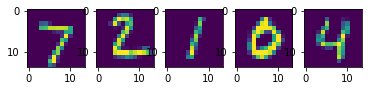

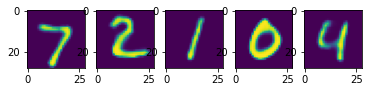

In [9]:
y_test_lr = autoencoder.predict(x_test_lr[0:5])
plotn(5,x_test_lr)
plotn(5,y_test_lr)

> **Exercise**: Try to train super-resolution network on [CIFAR-10](https://keras.io/api/datasets/cifar10/) for 2x and 4x upscaling. Use noise as input to 4x upscaling model and observe the result.

## Variational Auto-Encoders (VAE)

Traditional autoencoders reduce the dimension of the input data somehow, figuring out the important features of input images. However, latent vectors often do not make much sense. In other words, taking MNIST dataset as an example, figuring out which digits correspond to different latent vectors is not an easy task, because close latent vectors would not necessarily correspond to the same digits. 

On the other hand, to train *generative* models it is better to have some understanding of the latent space. This idea leads us to **variational auto-encoder** (VAE).

VAE is the autoencoder that learns to predict *statistical distribution* of the latent parameters, so-called **latent distribution**. For example, we can assume that latent vectors would be distributed as $N(\mathrm{z\_mean},e^{\mathrm{z\_log\_sigma}})$, where $\mathrm{z\_mean}, \mathrm{z\_log\_sigma} \in\mathbb{R}^d$. Encoder in VAE learns to predict those parameters, and then decoder takes a random vector from this distribution to reconstruct the object.

To summarize:

 * From input vector, we predict `z_mean` and `z_log_sigma` (instead of predicting the standard deviation itself, we predict it's logarithm)
 * We sample a vector `sample` from the distribution $N(\mathrm{z\_mean},e^{\mathrm{z\_log\_sigma}})$
 * Decoder tries to decode the original image using `sample` as an input vector

 <img src="images/vae.png" width="50%">

In [21]:
intermediate_dim = 512
latent_dim = 2
batch_size = 128

tf.compat.v1.disable_eager_execution()

inputs = Input(shape=(784,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [22]:
@tf.function
def sampling(args):
    z_mean, z_log_sigma = args
    bs = tf.shape(z_mean)[0]
    epsilon = tf.random.normal(shape=(bs, latent_dim))
    return z_mean + tf.exp(z_log_sigma) * epsilon

z = Lambda(sampling)([z_mean, z_log_sigma])

In [23]:
encoder = Model(inputs, [z_mean, z_log_sigma, z])

latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(784, activation='sigmoid')(x)

decoder = Model(latent_inputs, outputs)

outputs = decoder(encoder(inputs)[2])

vae = Model(inputs, outputs)

Variational auto-encoders use complex loss function that consists of two parts:
* **Reconstruction loss** is the loss function that shows how close reconstructed image is to the target (can be MSE). It is the same loss function as in normal autoencoders.
* **KL loss**, which ensures that latent variable distributions stays close to normal distribution. It is based on the notion of [Kullback-Leibler divergence](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained) - a metric to estimate how similar two statistical distributions are.

In [24]:
@tf.function
def vae_loss(x1,x2):
  reconstruction_loss = mse(x1,x2)*784
  tmp = 1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma)
  kl_loss = -0.5*tf.reduce_sum(tmp, axis=-1)
  return tf.convert_to_tensor(tf.reduce_mean(reconstruction_loss + kl_loss))

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [25]:
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train_flat, x_train_flat,
        shuffle=True,
        epochs=25,
        batch_size=batch_size,
        validation_data=(x_test_flat, x_test_flat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
59520/60000 [============================>.] - ETA: 0s - loss: 48.6396

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 4s 64us/sample - loss: 48.5874 - val_loss: 41.8877
Epoch 2/25
60000/60000 [==============================] - 3s 57us/sample - loss: 41.1296 - val_loss: 40.2556
Epoch 3/25
60000/60000 [==============================] - 3s 56us/sample - loss: 40.0063 - val_loss: 39.3692
Epoch 4/25
60000/60000 [==============================] - 3s 56us/sample - loss: 39.2531 - val_loss: 38.7666
Epoch 5/25
60000/60000 [==============================] - 3s 57us/sample - loss: 38.7147 - val_loss: 38.6124
Epoch 6/25
60000/60000 [==============================] - 3s 57us/sample - loss: 38.2962 - val_loss: 38.1867
Epoch 7/25
60000/60000 [==============================] - 3s 56us/sample - loss: 37.9756 - val_loss: 37.9831
Epoch 8/25
60000/60000 [==============================] - 3s 57us/sample - loss: 37.6933 - val_loss: 37.5475
Epoch 9/25
60000/60000 [==============================] - 3s 57us/sample - loss: 37.4323 - val_loss: 37.2913
Epoch 10/25
60000/60000 [=====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


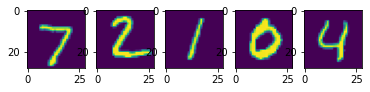

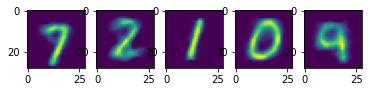

In [26]:
y_test = vae.predict(x_test_flat[0:5])
plotn(5,x_test_flat)
plotn(5,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


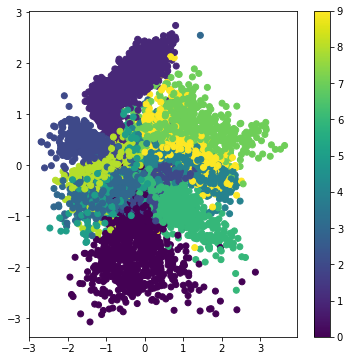

In [27]:
x_test_encoded = encoder.predict(x_test_flat)[0]
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_testclass)
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


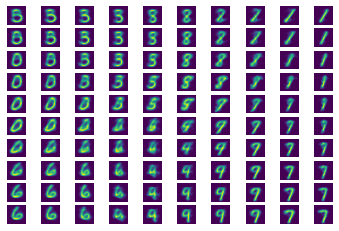

In [28]:
def plotsample(n):
  dx = np.linspace(-1,1,n)
  dy = np.linspace(-1,1,n)
  fig,ax = plt.subplots(n,n)
  for i,xi in enumerate(dx):
    for j,xj in enumerate(dy):
      res = decoder.predict(np.array([xi,xj]).reshape(-1,2))[0]
      ax[i,j].imshow(res.reshape(28,28))
      ax[i,j].axis('off')
  plt.show()
  
plotsample(10)

> **Task**: In our sample, we have trained fully-connected VAE. Now take the CNN from traditional auto-encoder above and create CNN-based VAE.

## Additional Materials

* [Blog post on NeuroHive](https://neurohive.io/ru/osnovy-data-science/variacionnyj-avtojenkoder-vae/)
* [Variational Autoencoders Explained](https://kvfrans.com/variational-autoencoders-explained/)